In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
dir = "/content/drive/My Drive/DM_PR_DATASET"

values = pd.read_csv(dir+"/values.csv").drop('building_id', axis=1)
labels = pd.read_csv(dir+"/labels.csv").drop('building_id', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
land_condition_encode = list(set(values['land_surface_condition']))
values['land_surface_condition'] = values.land_surface_condition.map(lambda x: land_condition_encode.index(x))

In [3]:
foundation_type_encode = list(set(values['foundation_type']))
values['foundation_type'] = values.foundation_type.map(lambda x: foundation_type_encode.index(x))

In [4]:
roof_type_encode = list(set(values['roof_type']))
values['roof_type'] = values.roof_type.map(lambda x: roof_type_encode.index(x))

In [5]:
ground_floor_type_encode = list(set(values['ground_floor_type']))
values['ground_floor_type'] = values.ground_floor_type.map(lambda x: ground_floor_type_encode.index(x))

In [6]:
other_floor_type_encode = list(set(values['other_floor_type']))
values['other_floor_type'] = values.other_floor_type.map(lambda x: other_floor_type_encode.index(x))

In [7]:
position_encode = list(set(values['position']))
values['position'] = values.position.map(lambda x: position_encode.index(x))

In [8]:
plan_configuration_encode = list(set(values['plan_configuration']))
values['plan_configuration'] = values.plan_configuration.map(lambda x: plan_configuration_encode.index(x))

In [9]:
legal_ownership_status_encode = list(set(values['legal_ownership_status']))
values['legal_ownership_status'] = values.legal_ownership_status.map(lambda x: legal_ownership_status_encode.index(x))

In [ ]:
import numpy as np
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
values_minmax = min_max_scaler.fit_transform(values)

In [10]:
import numpy as np
norm_values = (values-np.mean(values))/np.std(values)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(values)
scaled_values = scaler.transform(values)

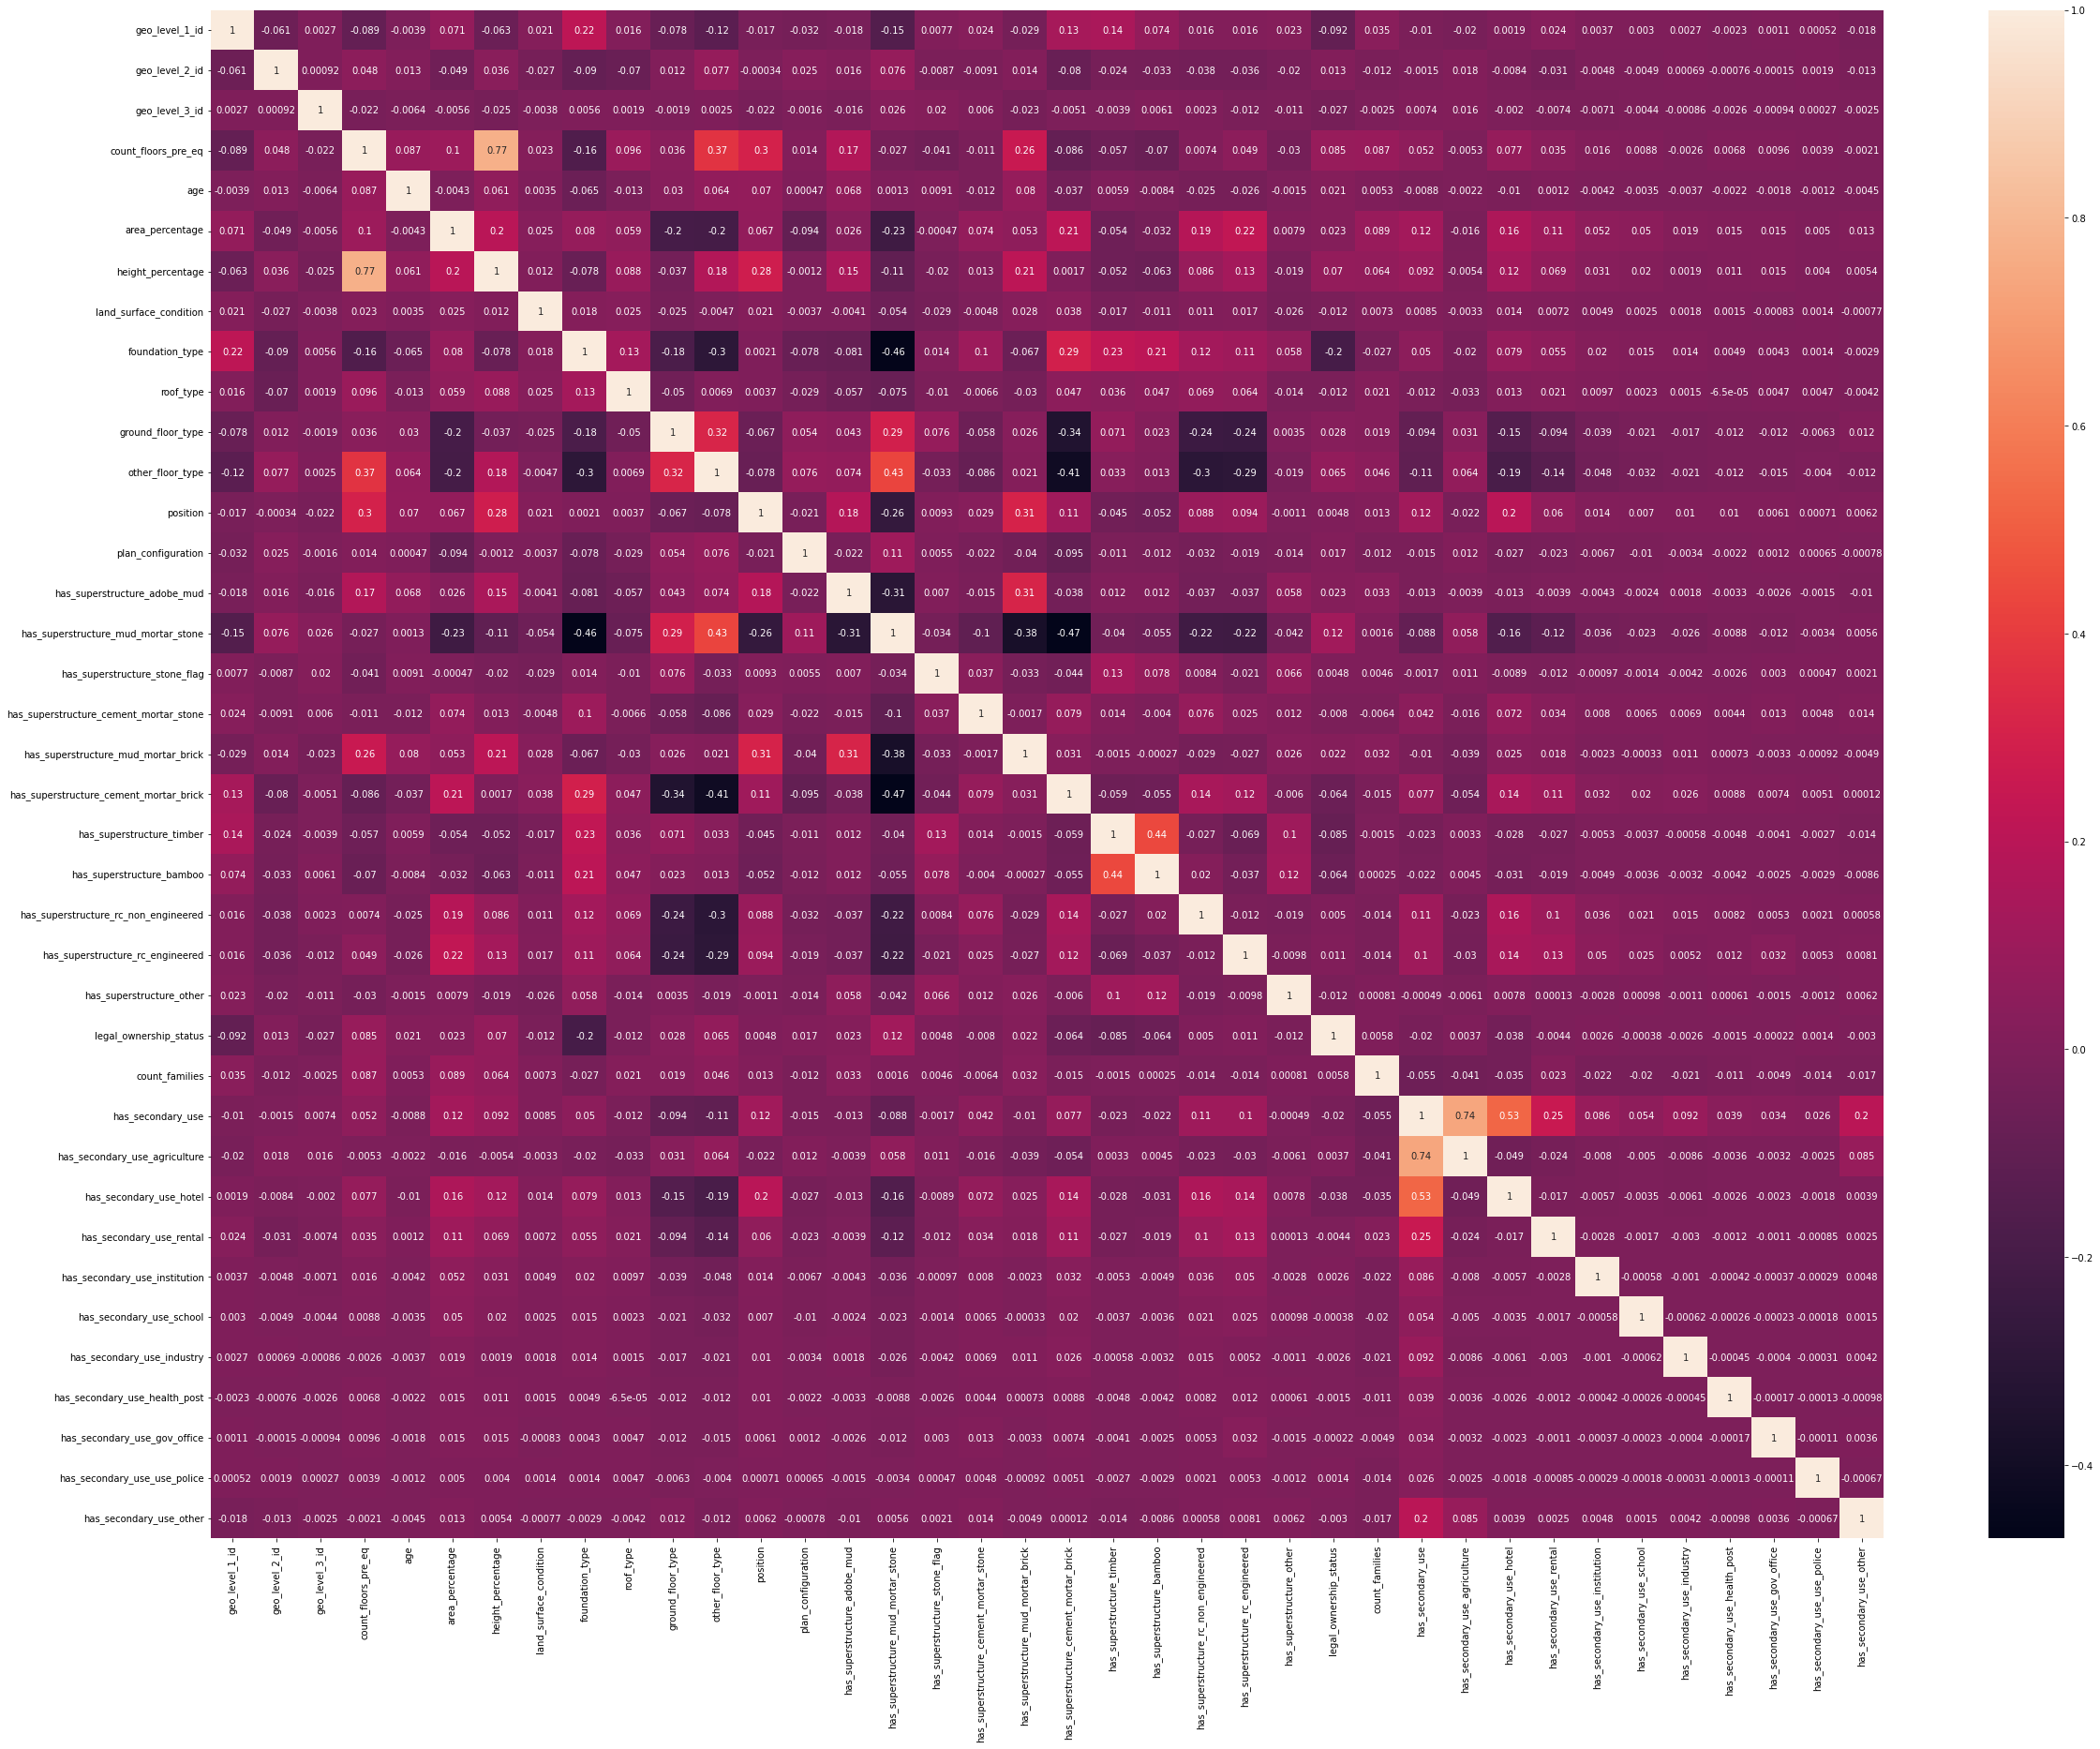

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
cor = values.corr()
plt.figure(figsize=(40,30))
sb.heatmap(cor, annot=True)

In [11]:
norm_values = norm_values.drop(columns=['has_secondary_use', 'height_percentage'], axis=1)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
model = SVC(kernel='linear')
sfs = SequentialFeatureSelector(model, n_features_to_select=17, scoring='accuracy')
sfs.fit(norm_values[:1000], labels[:1000]['damage_grade'])

SequentialFeatureSelector(estimator=SVC(kernel='linear'),
                          n_features_to_select=17, scoring='accuracy')

In [ ]:
norm_values_sfs = sfs.transform(norm_values)

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
# summarize class distribution
counter = Counter(labels['damage_grade'])
print(counter)
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(norm_values, labels['damage_grade'])
counter = Counter(y)
print(counter)

Counter({2: 148259, 3: 87218, 1: 25124})
Counter({3: 148259, 2: 148259, 1: 148259})


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':(1e-5, 1e-4, 1e-3), 'learning_rate_init':(1e-4, 1e-3, 1e-2), 'learning_rate':('constant', 'adaptive')}
model = MLPClassifier(activation='tanh', validation_fraction=0.25, hidden_layer_sizes=32, max_iter=500)
clf = GridSearchCV(model, parameters, verbose=3, scoring="accuracy", cv=5)
clf.fit(norm_values[:10000], labels[:10000]['damage_grade'])

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.0001;, score=0.617 total time=  17.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.0001;, score=0.601 total time=  16.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.0001;, score=0.587 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.0001;, score=0.597 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.0001;, score=0.602 total time=  16.6s
[CV 1/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.001;, score=0.604 total time=  15.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.001;, score=0.576 total time=  16.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.001;, score=0.560 total time=  16.2s
[CV 4/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.001;, score=0.577 total time=  15.0s
[CV 5/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.001;, score=0.588 total time=  15.1s
[CV 1/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.01;, score=0.606 total time=   7.3s
[CV 2/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.01;, score=0.565 total time=   3.0s
[CV 3/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.01;, score=0.582 total time=   6.4s
[CV 4/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.01;, score=0.575 total time=   5.3s
[CV 5/5] END alpha=1e-05, learning_rate=constant, learning_rate_init=0.01;, score=0.592 total time=   5.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.613 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.602 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.590 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.602 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.604 total time=  15.9s
[CV 1/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.001;, score=0.588 total time=  14.4s
[CV 2/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.001;, score=0.582 total time=  14.2s
[CV 3/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.001;, score=0.567 total time=  12.1s
[CV 4/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.001;, score=0.579 total time=  16.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.001;, score=0.580 total time=  16.2s
[CV 1/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.01;, score=0.601 total time=   7.3s
[CV 2/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.01;, score=0.578 total time=   4.1s
[CV 3/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.01;, score=0.576 total time=   7.5s
[CV 4/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.01;, score=0.576 total time=   6.6s
[CV 5/5] END alpha=1e-05, learning_rate=adaptive, learning_rate_init=0.01;, score=0.570 total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.0001;, score=0.621 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.0001;, score=0.612 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.0001;, score=0.598 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.0001;, score=0.585 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.0001;, score=0.609 total time=  15.8s
[CV 1/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.001;, score=0.591 total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.001;, score=0.572 total time=  16.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.001;, score=0.580 total time=  16.1s
[CV 4/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.001;, score=0.579 total time=  14.0s
[CV 5/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.001;, score=0.578 total time=  11.8s
[CV 1/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.01;, score=0.597 total time=   5.9s
[CV 2/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.01;, score=0.565 total time=   7.0s
[CV 3/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.01;, score=0.582 total time=   4.8s
[CV 4/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.01;, score=0.579 total time=   4.4s
[CV 5/5] END alpha=0.0001, learning_rate=constant, learning_rate_init=0.01;, score=0.566 total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.599 total time=  15.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.604 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.591 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.586 total time=  17.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.596 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.609 total time=  16.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.606 total time=  16.1s
[CV 3/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.593 total time=  14.4s
[CV 4/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.579 total time=   9.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.583 total time=  16.0s
[CV 1/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.584 total time=   4.0s
[CV 2/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.588 total time=   5.2s
[CV 3/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.574 total time=   5.0s
[CV 4/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.592 total time=   7.6s
[CV 5/5] END alpha=0.0001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.548 total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.0001;, score=0.607 total time=  15.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.0001;, score=0.598 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.0001;, score=0.596 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.0001;, score=0.589 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.0001;, score=0.601 total time=  15.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.001;, score=0.594 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.001;, score=0.586 total time=  16.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.001;, score=0.596 total time=  16.0s
[CV 4/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.001;, score=0.575 total time=  15.1s
[CV 5/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.001;, score=0.567 total time=  13.3s
[CV 1/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.01;, score=0.568 total time=   5.3s
[CV 2/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.01;, score=0.579 total time=   6.6s
[CV 3/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.01;, score=0.565 total time=   6.2s
[CV 4/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.01;, score=0.588 total time=   4.7s
[CV 5/5] END alpha=0.001, learning_rate=constant, learning_rate_init=0.01;, score=0.572 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.607 total time=  17.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.590 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.592 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.589 total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.0001;, score=0.602 total time=  15.7s
[CV 1/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.601 total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.559 total time=  16.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.581 total time=  16.1s
[CV 4/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.601 total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.001;, score=0.575 total time=  16.0s
[CV 1/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.586 total time=   7.0s
[CV 2/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.585 total time=   8.5s
[CV 3/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.582 total time=   3.5s
[CV 4/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.568 total time=   6.3s
[CV 5/5] END alpha=0.001, learning_rate=adaptive, learning_rate_init=0.01;, score=0.573 total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=32,
                                     max_iter=500, validation_fraction=0.25),
             param_grid={'alpha': (1e-05, 0.0001, 0.001),
                         'learning_rate': ('constant', 'adaptive'),
                         'learning_rate_init': (0.0001, 0.001, 0.01)},
             scoring='accuracy', verbose=3)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_values, labels['damage_grade'], stratify=labels['damage_grade'], test_size=0.6)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_pred = dict()
svm_acc = dict()
svm_train_set, extra, svm_train_label, extra =  train_test_split(X_train, y_train, stratify=y_train, test_size=0.9)
svm_test_set, extra, svm_test_label, extra =  train_test_split(X_test, y_test, stratify=y_test, test_size=0.9)
for k in ["linear", "poly", "rbf"]:
  pred = SVC(kernel=k).fit(svm_train_set, svm_train_label).predict(svm_test_set)
  svm_pred[k] = pred
  acc = accuracy_score(svm_test_label, pred)
  print("Kernel: " + k + " => Accuracy: "+ str(acc))
  svm_acc[k] = acc
del acc
del k

Kernel: linear => Accuracy: 0.5745715016628293
Kernel: poly => Accuracy: 0.5765541059094398
Kernel: rbf => Accuracy: 0.5980429777436684


In [15]:
from sklearn.metrics import classification_report
for k in svm_pred.keys():
  print("Kernel: " + k)
  print(classification_report(svm_test_label, svm_pred[k]))
  print("-----------------------------------------------------")

Kernel: linear
              precision    recall  f1-score   support

           1       0.66      0.11      0.19      1507
           2       0.57      0.99      0.73      8896
           3       0.45      0.00      0.00      5233

    accuracy                           0.57     15636
   macro avg       0.56      0.37      0.31     15636
weighted avg       0.54      0.57      0.43     15636

-----------------------------------------------------
Kernel: poly
              precision    recall  f1-score   support

           1       0.52      0.31      0.39      1507
           2       0.59      0.90      0.71      8896
           3       0.50      0.10      0.16      5233

    accuracy                           0.58     15636
   macro avg       0.53      0.44      0.42     15636
weighted avg       0.55      0.58      0.50     15636

-----------------------------------------------------
Kernel: rbf
              precision    recall  f1-score   support

           1       0.57      0.25  

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf_acc = dict()
clf_pred = dict()
for size in [8, 16, 32, 64]:
    pred = MLPClassifier(alpha=1e-5, hidden_layer_sizes=size, validation_fraction=0.25, activation='tanh', max_iter=500, learning_rate_init=1e-3).fit(X_train, y_train).predict(X_test)
    clf_pred[size] = pred
    acc = accuracy_score(y_test, pred)
    print("Hidden layer size:" + str(size) + " => Accuracy: "+ str(acc))
    clf_acc[size] = acc
del acc
del size

Hidden layer size:8 => Accuracy: 0.6480388332128856
Hidden layer size:16 => Accuracy: 0.6542999852904496
Hidden layer size:32 => Accuracy: 0.6636245611117861
Hidden layer size:64 => Accuracy: 0.6642449204085418


In [23]:
from sklearn.metrics import classification_report
for size in clf_pred.keys():
  print("Hidden Layer Size: " + str(size))
  print(classification_report(y_test, clf_pred[size]))
  print("-----------------------------------------------------")

Hidden Layer Size: 8
              precision    recall  f1-score   support

           1       0.59      0.32      0.42     15074
           2       0.65      0.82      0.73     88956
           3       0.64      0.45      0.53     52331

    accuracy                           0.65    156361
   macro avg       0.63      0.53      0.56    156361
weighted avg       0.64      0.65      0.63    156361

-----------------------------------------------------
Hidden Layer Size: 16
              precision    recall  f1-score   support

           1       0.60      0.36      0.45     15074
           2       0.66      0.81      0.73     88956
           3       0.64      0.47      0.54     52331

    accuracy                           0.65    156361
   macro avg       0.63      0.55      0.57    156361
weighted avg       0.65      0.65      0.64    156361

-----------------------------------------------------
Hidden Layer Size: 32
              precision    recall  f1-score   support

          